In [1]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
plt.style.use('science')
import torch

from pepsflow.iPEPS_trainer import iPEPSTrainer
from pepsflow.models.observables import Observables

# Using previous chi run

In [7]:
lambda_values = [lam for lam in np.arange(2.5, 3.2, 0.05)]

chi = 4
trainer = iPEPSTrainer(chi = chi, d = 2, gpu=False)
trainer.exe(lambda_values, epochs=5, use_prev=False, runs = 5, max_iter=10)
trainer.save_data(fn = f"correlation_length/chi{chi}")

100%|██████████| 15/15 [07:31<00:00, 30.08s/it]

Data saved to data\correlation_length/chi4.pth


In [2]:
data = torch.load("data/correlation_length/chi4.pth", weights_only=False)
lambda_values = data.keys()
Mz, energies = [], []
for lam in lambda_values:
    E, C, T = data[lam].forward()
    A = data[lam].params[data[lam].map]
    energies.append(E.detach().cpu().numpy())
    Mz.append(abs(Observables.M(A, C, T)[2].detach().cpu().numpy()))

plt.figure(figsize=(6, 4))
plt.plot(lambda_values, energies, 'v-', markersize=4, linewidth=0.5)
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$E$")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(lambda_values, Mz, 'v-', markersize=4, linewidth=0.5)
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\langle M_z \rangle$")
plt.show()

NameError: name 'lambda_values' is not defined

In [13]:
for chi in [8, 16]:
    trainer = iPEPSTrainer(chi = chi, d = 2, gpu=False, data_fn = f"data/correlation_length/chi4.pth")
    trainer.exe(lambda_values, epochs=5, use_prev=False, max_iter=10, lr = 0.01)
    trainer.save_data(fn = f"correlation_length/chi{chi}")


100%|██████████| 15/15 [01:13<00:00,  4.93s/it]


Data saved to data\correlation_length/chi8.pth


100%|██████████| 15/15 [01:36<00:00,  6.40s/it]

Data saved to data\correlation_length/chi16.pth


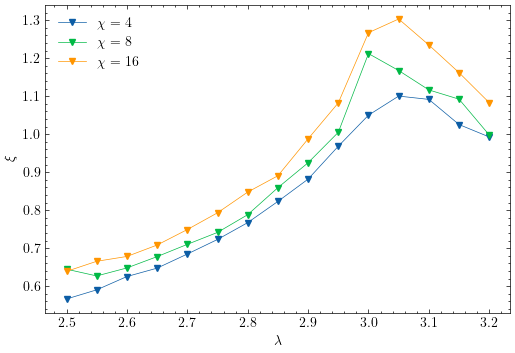

In [21]:
plt.figure(figsize=(6, 4))
for chi in [4, 8, 16]:

    data = torch.load(f"data/correlation_length/chi{chi}.pth", weights_only=False)
    lamda_values = data.keys()
    xi = []
    for lam in lambda_values:
        E, C, T = data[lam].forward()
        xi.append(Observables.xi(T.detach()))
    plt.plot(lambda_values, xi, 'v-', markersize=4, linewidth=0.5, label = rf"$\chi$ = {chi}")

plt.legend()
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\xi$")
plt.show()

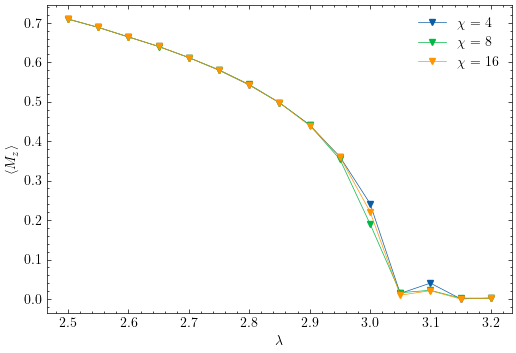

In [25]:
plt.figure(figsize=(6, 4))
for chi in [4, 8, 16]:

    data = torch.load(f"data/correlation_length/chi{chi}.pth", weights_only=False)
    lamda_values = data.keys()
    Mz = []
    for lam in lambda_values:
        E, C, T = data[lam].forward()
        A = data[lam].params[data[lam].map]
        Mz.append(abs(Observables.M(A, C, T)[2].detach().cpu().numpy()))
    plt.plot(lambda_values, Mz, 'v-', markersize=4, linewidth=0.5, label = rf"$\chi$ = {chi}")

plt.legend()
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\langle M_z \rangle$")
plt.show()

# Using previous lambda run

In [27]:
lambda_values = [lam for lam in np.arange(2.5, 3.2, 0.05)]

chi = 4
trainer = iPEPSTrainer(chi = chi, d = 2, gpu=False)
trainer.exe(lambda_values, epochs=5, use_prev=True, max_iter=20, lr=0.01)
trainer.save_data(fn = f"correlation_length_prev/chi{chi}")

100%|██████████| 15/15 [01:53<00:00,  7.53s/it]

Data saved to data\correlation_length_prev/chi4.pth


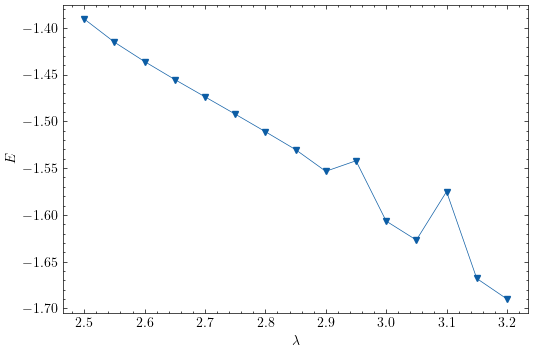

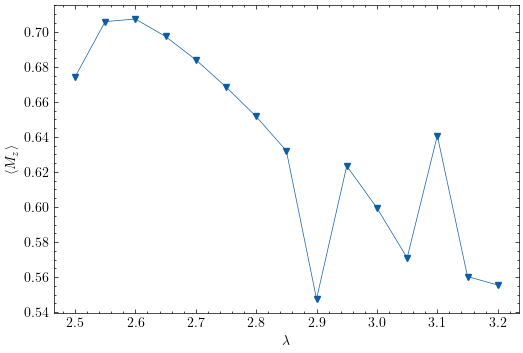

In [28]:
data = torch.load("data/correlation_length_prev/chi4.pth", weights_only=False)
lamda_values = data.keys()
Mz, energies = [], []
for lam in lambda_values:
    E, C, T = data[lam].forward()
    A = data[lam].params[data[lam].map]
    energies.append(E.detach().cpu().numpy())
    Mz.append(abs(Observables.M(A, C, T)[2].detach().cpu().numpy()))

plt.figure(figsize=(6, 4))
plt.plot(lambda_values, energies, 'v-', markersize=4, linewidth=0.5)
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$E$")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(lambda_values, Mz, 'v-', markersize=4, linewidth=0.5)
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\langle M_z \rangle$")
plt.show()